# Importing Pakages, Dataset

In [1]:
import pandas as pd #
import matplotlib.pyplot as plt #
import seaborn as sns #
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings #
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
data = pd.read_excel("churn_prediction.xlsx")
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,229.53
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234.38
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174.07
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231.48
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165.14


# Data Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
data.shape

(5630, 20)

In [5]:
# Check numeric values
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


## Handling missing values + duplicates

<Axes: >

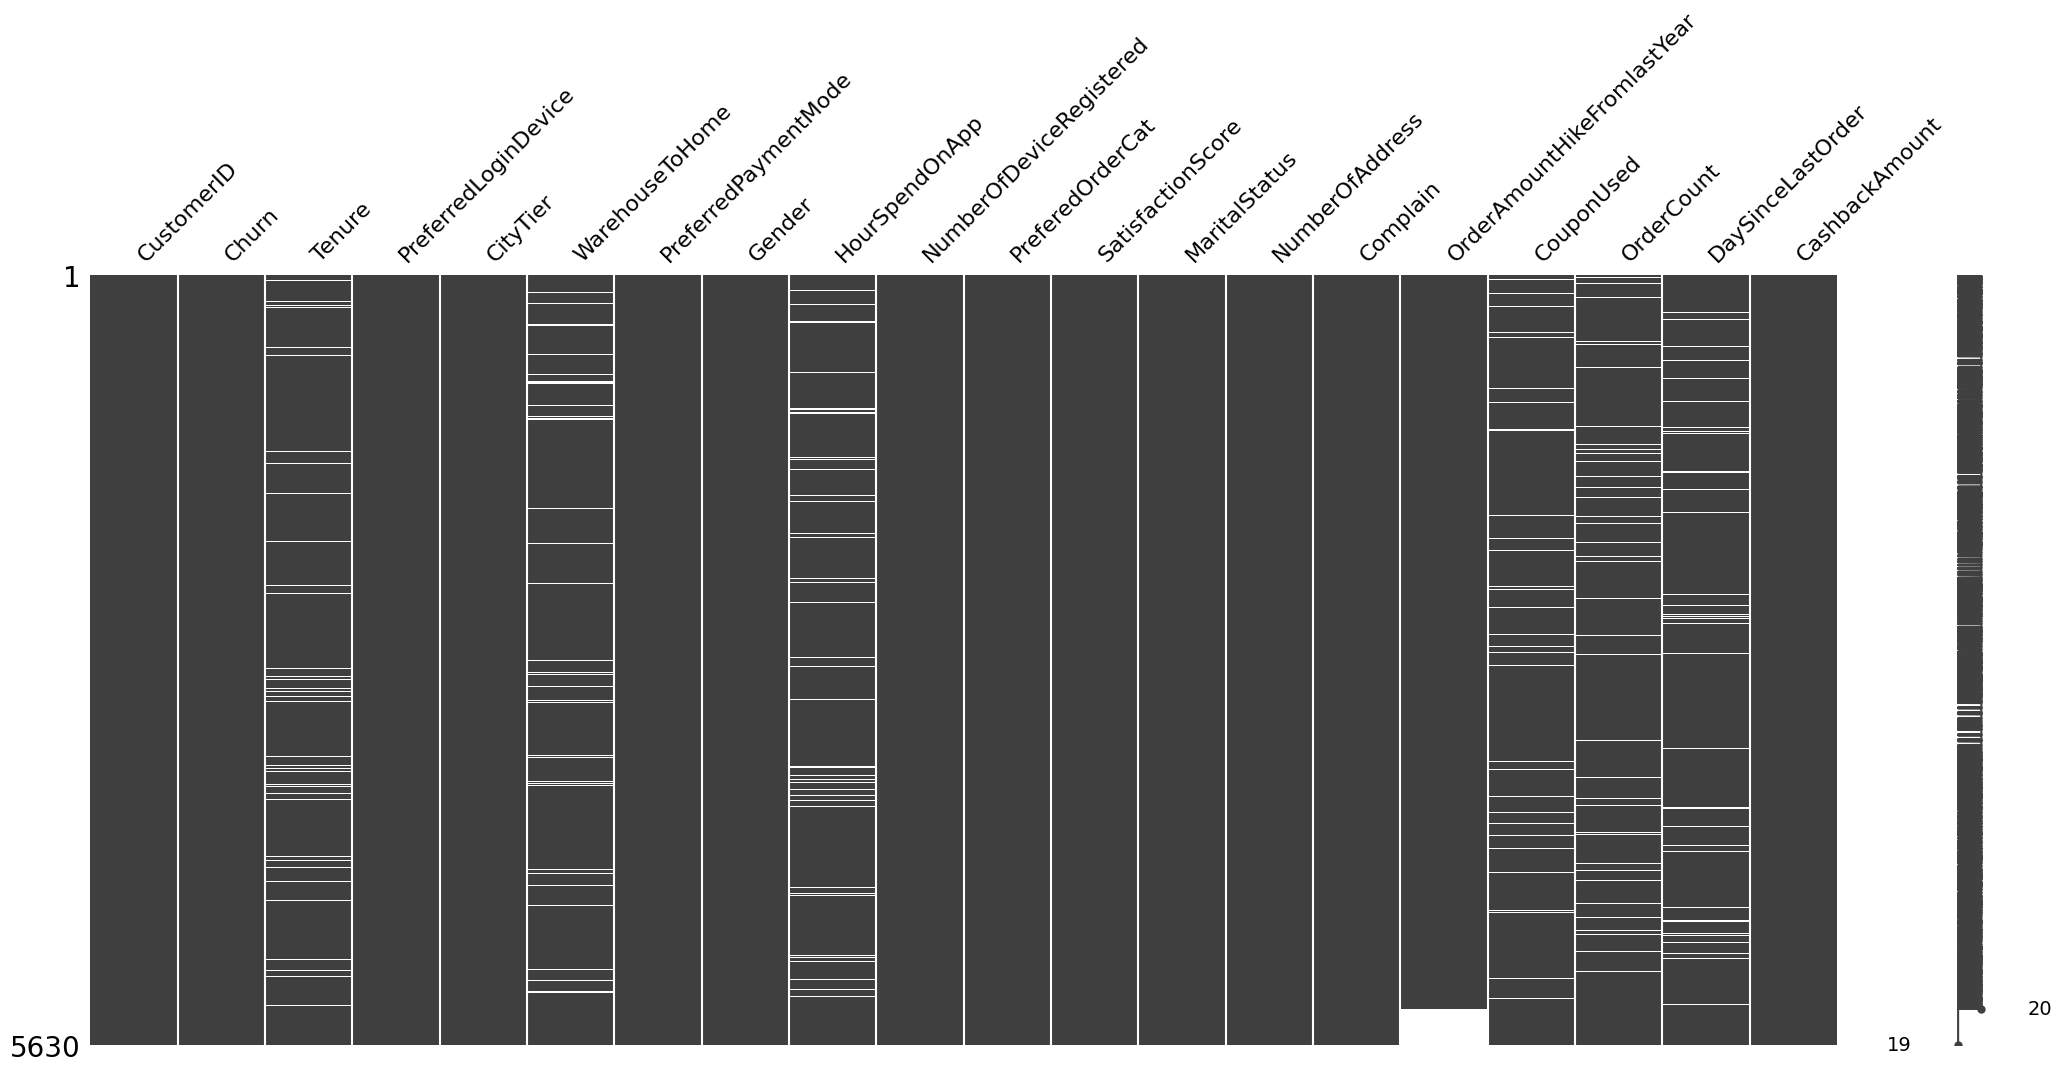

In [6]:
# Missing value matrix
msno.matrix(data)

**Assumption:** Các cột bị missing values có thể điều bị lỗi nhập dữ liệu, dẫn đến tình trạng bị thiếu data

**Action:** Drop các sample bị missing values

<Axes: >

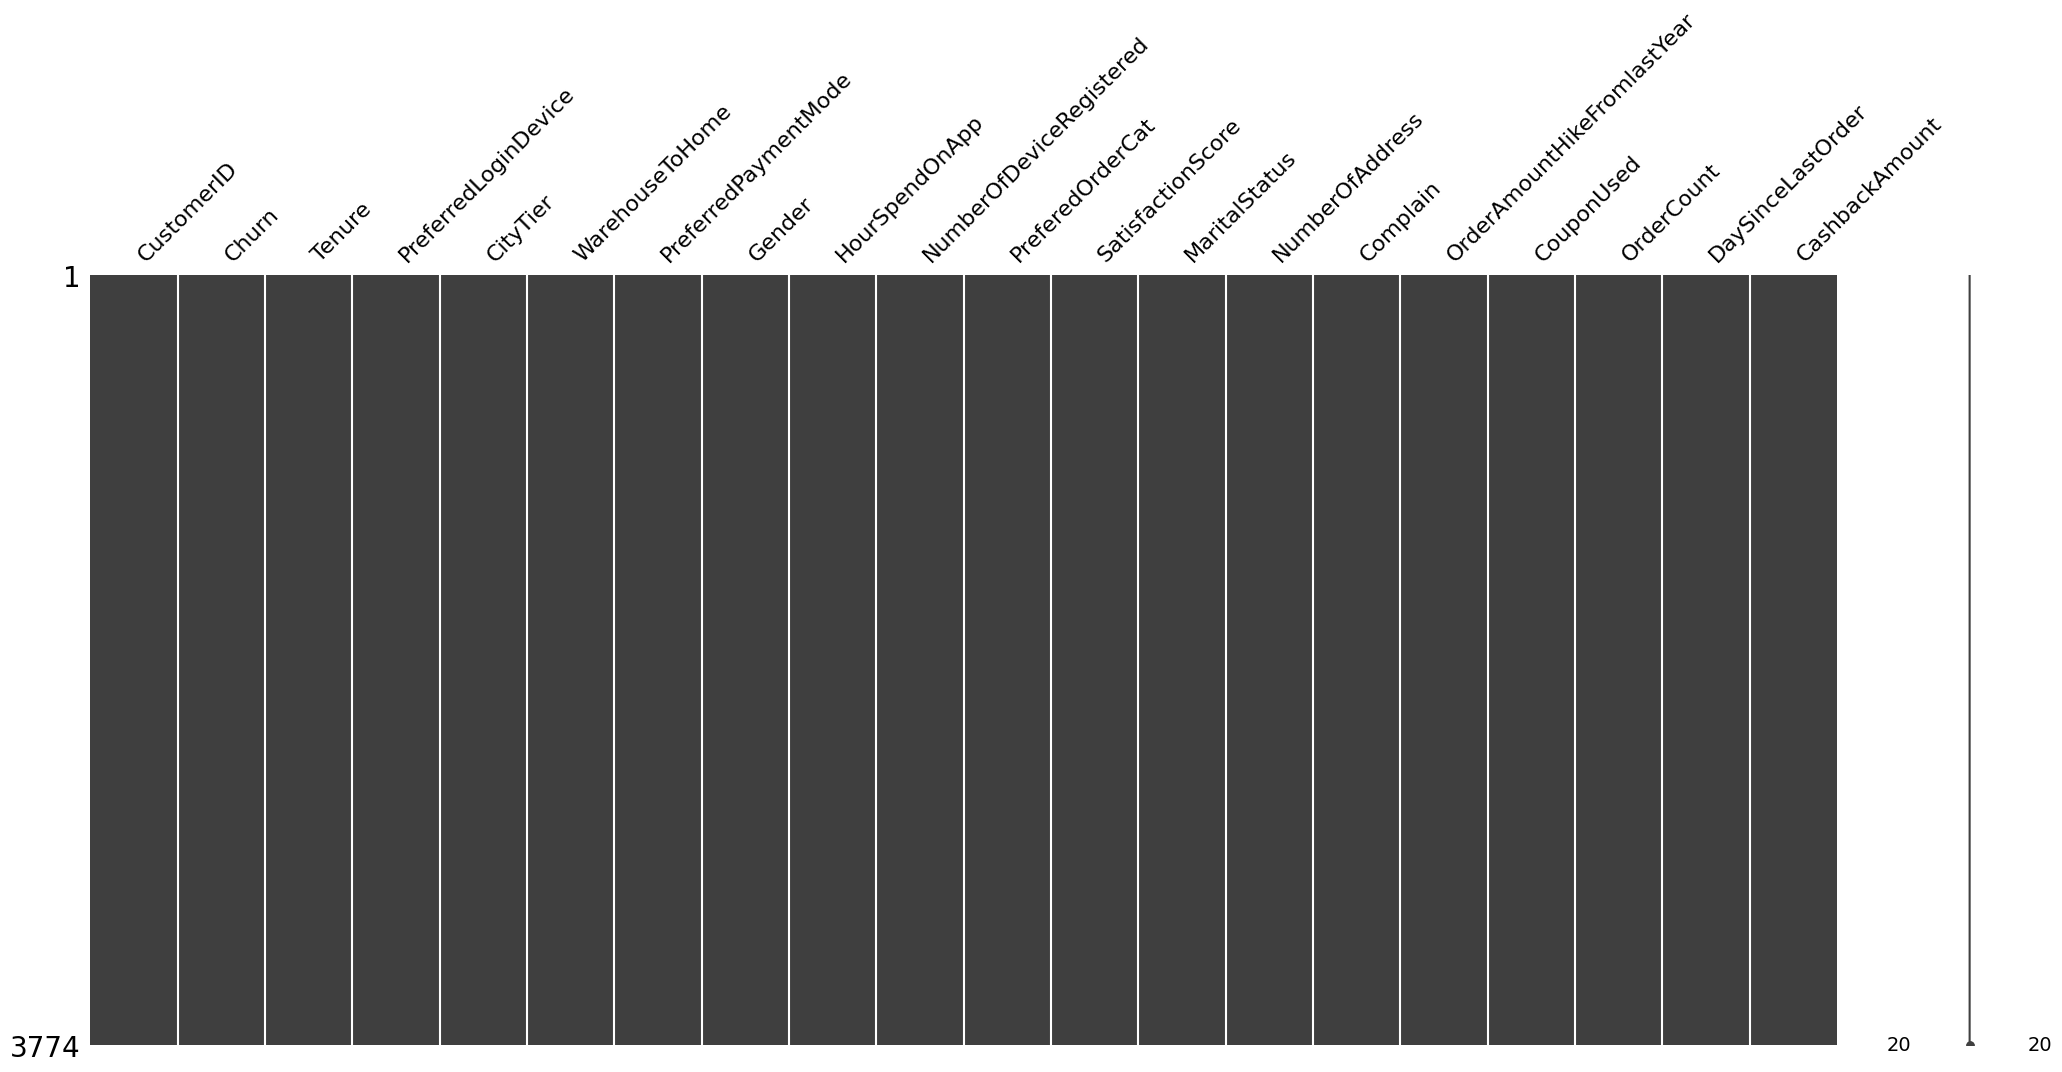

In [7]:
# Drop missing values
data.dropna(inplace=True)
msno.matrix(data)

In [8]:
# Check duplicate values
duplicate_count = data.duplicated().sum()
print(f'There are {duplicate_count} duplicate values')

There are 0 duplicate values


# Feature Engineering

## Potential Feature Selection

Columns to drop: CustomerID, Gender, MaritialStatus

In [9]:
# Drop columns
exclude_cols = ['CustomerID', 'Gender', 'MaritalStatus']
data.drop(columns=exclude_cols, inplace=True)
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2,0,16.0,Mobile Phone,3,7.0,Debit Card,3.0,4,Laptop & Accessory,3,3,0,26.0,5.0,12.0,7.0,174.07
3,0,5.0,Mobile Phone,1,16.0,Debit Card,3.0,4,Fashion,4,3,0,26.0,2.0,2.0,9.0,231.48
4,0,9.0,Mobile Phone,1,28.0,Debit Card,3.0,4,Laptop & Accessory,2,3,1,26.0,1.0,2.0,8.0,165.14
5,0,1.0,Mobile Phone,1,16.0,Debit Card,3.0,4,Mobile Phone,5,3,0,26.0,1.0,2.0,1.0,150.52
6,0,18.0,Mobile Phone,1,36.0,UPI,3.0,4,Laptop & Accessory,2,3,0,26.0,2.0,2.0,18.0,170.41


## Encoding

In [10]:
# Encoding
cate_cols = data.select_dtypes(include=['object'])
for col in cate_cols:
    print(f"{col}:{data[col].nunique()}")

PreferredLoginDevice:3
PreferredPaymentMode:7
PreferedOrderCat:6


In [11]:
list_column = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']
df_encoded = pd.get_dummies(data, columns = list_column, drop_first=True)
df_encoded.head(2)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
2,0,16.0,3,7.0,3.0,4,3,3,0,26.0,...,False,False,True,False,False,False,True,False,False,False
3,0,5.0,1,16.0,3.0,4,4,3,0,26.0,...,False,False,True,False,False,False,False,False,False,False


# Model Training

## Spliting dataset into Train/Test

In [12]:
# Split train/test set
from sklearn.model_selection import train_test_split
x = df_encoded.drop(columns='Churn', axis = 1)
y = df_encoded['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 1887
Number data of test set: 1887


## Normalization for Dataset

In [13]:
# Normalize for each data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Apply base Random Forest model

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)
rf_model.fit(x_train_scaled, y_train)

y_rf_pred_val = rf_model.predict(x_train_scaled)
y_rf_pred_train = rf_model.predict(x_test_scaled)
balance_accuracy_val = metrics.balanced_accuracy_score(y_test, y_rf_pred_train)

print(balance_accuracy_val)

0.8613106490233144


## Feature Importance

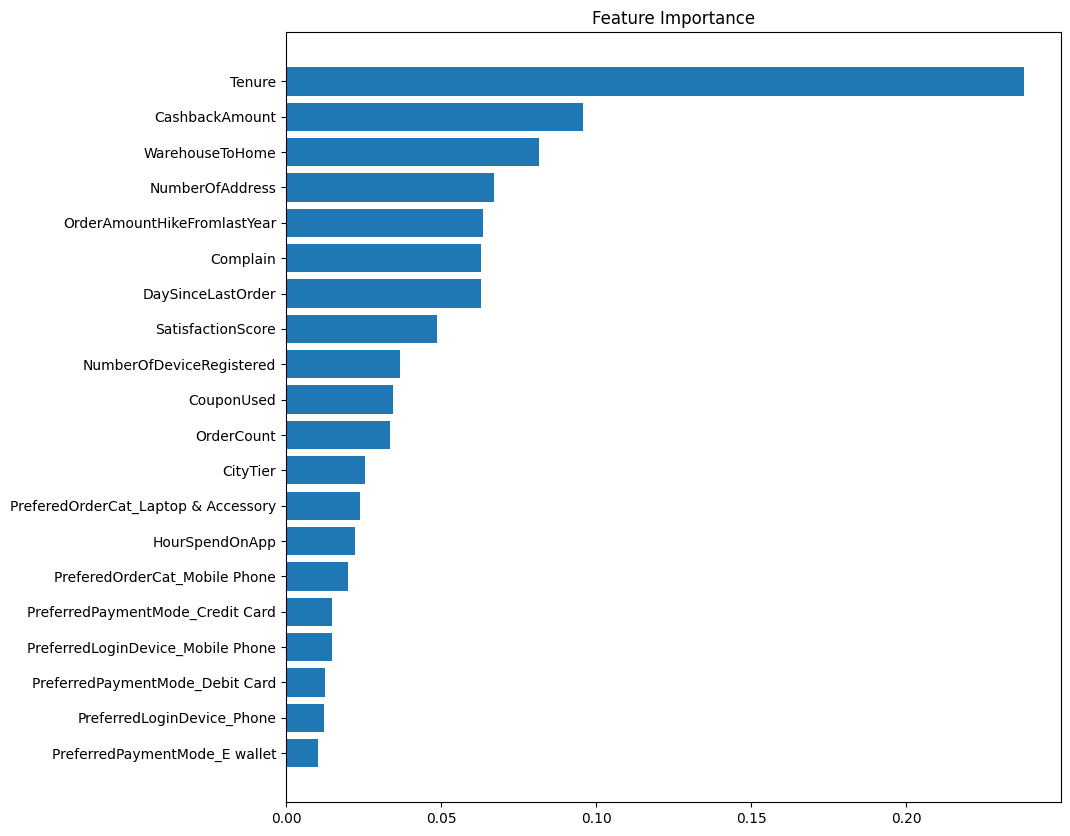

In [15]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, rf_model.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Importance')

# Show plot
plt.show()

## Distribution of Clusters

In [16]:
# Filter only churned customers
churn_df = data[data['Churn'] == 1].copy()

In [17]:
top_features = ['Tenure', 'CashbackAmount', 'WarehouseToHome',
                'NumberOfAddress', 'OrderAmountHikeFromlastYear']

x = churn_df[top_features]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
churn_df['Cluster'] = kmeans.fit_predict(x_scaled)


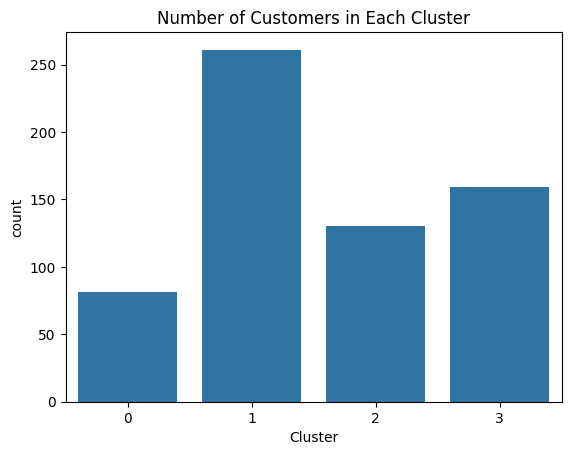

In [20]:
sns.countplot(x='Cluster', data=churn_df)
plt.title("Number of Customers in Each Cluster")
plt.show()


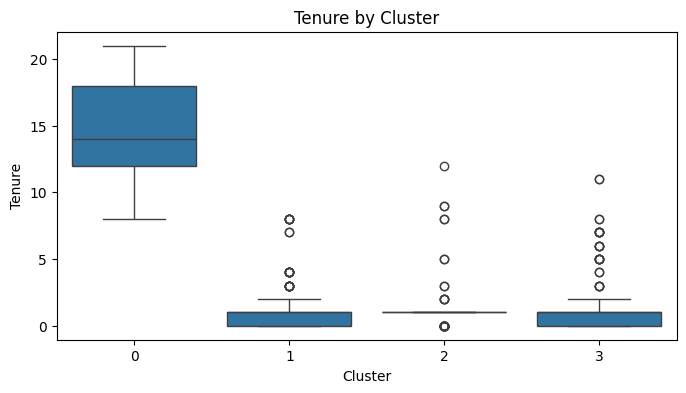

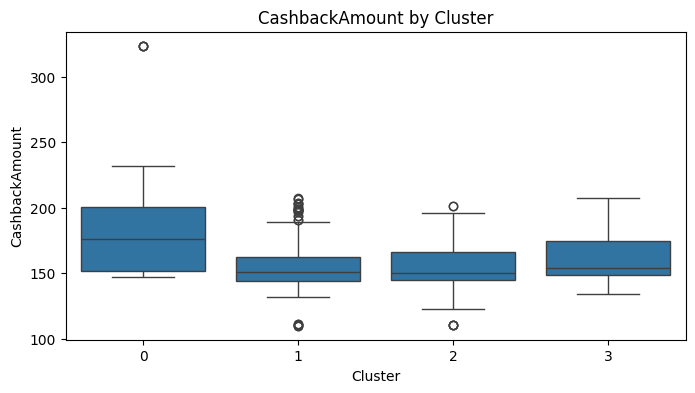

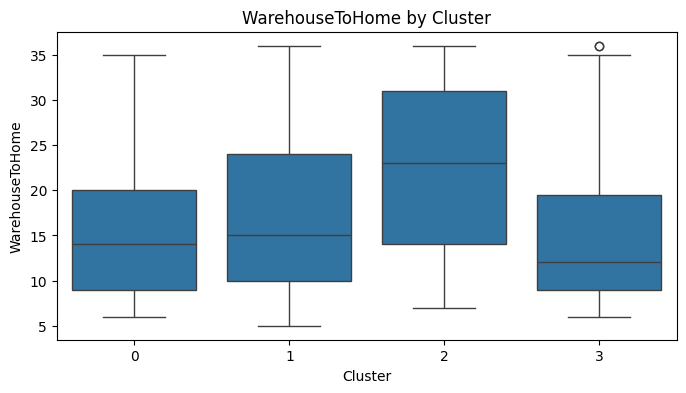

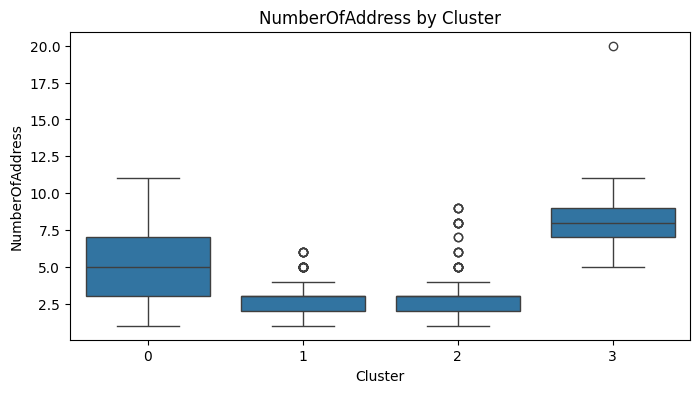

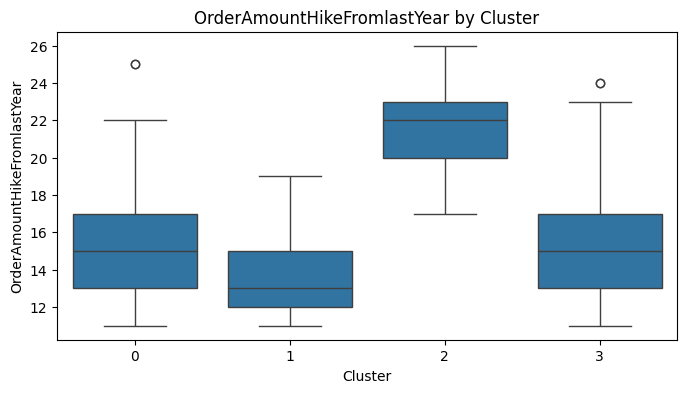

In [21]:
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=churn_df)
    plt.title(f'{feature} by Cluster')
    plt.show()


**Insight**: Các khách hàng churn chủ yếu là những khách hàng có khoảng thời gian gắn bó chưa lâu dài với công ty, thường không sử dụng chương trình khuyến mãi khi mua hàng dẫn đến số tiền hoàn lại ít. Ngoài ra họ cũng ở những vị trí khá xa so với kho hàng của công ty, điều này có thể dẫn đến việc vận chuyển hàng lâu gây bất tiện. Các khách hàng churn đặt rất ít đơn hàng so với năm trước.

**Action**: Đưa ra các chương trình ưu đãi khách hàng mới, cập nhật những voucher ưu đãi để kích thích mua hàng hoặc tích điểm khi đặt nhiều đơn hàng. Ngoài ra cũng nên đưa ra những ưu đãi chi phí vận chuyển. Công ty cũng nên cải thiện khâu logistics nhằm vận chuyển đơn hàng đến với khách hàng sớm nhất.

**Cụm 0**

Tenure cao: Nhóm này có thời gian gắn bó lâu với công ty (trung vị khoảng 15 tháng trở lên).

CashbackAmount cao: Họ nhận được nhiều hoàn tiền hơn trung bình.

WarehouseToHome ở mức trung bình (~15).

NumberOfAddress ở mức vừa phải: Khoảng 4–6 địa chỉ.

OrderAmountHikeFromlastYear hơi cao hơn các nhóm khác.

**Nhận định:** Đây là nhóm khách hàng trung thành, chi tiêu nhiều nhưng vẫn rời bỏ. Có thể do không hài lòng hoặc yếu tố bên ngoài. Là nhóm nên ưu tiên giữ chân.

**Cụm 1**

Tenure rất thấp: Hầu hết là khách hàng mới (trung vị ~1 tháng).

CashbackAmount trung bình thấp, ít biến động.

WarehouseToHome hơi thấp.

NumberOfAddress thấp: Khoảng 2–3 địa chỉ.

OrderAmountHikeFromlastYear thấp.

Nhận định: Đây là nhóm người dùng mới nhưng rời bỏ sớm. Có thể do trải nghiệm ban đầu không tốt hoặc vấn đề onboarding.

**Cụm 2**

Tenure rất thấp (tương tự cụm 1).

CashbackAmount trung bình, có vài điểm ngoại lệ.

WarehouseToHome cao nhất: Thời gian giao hàng có thể chậm.

NumberOfAddress thấp.

OrderAmountHikeFromlastYear thấp.

Nhận định: Nhóm này có thể là người dùng mới bị ảnh hưởng bởi giao hàng chậm. Cần cải thiện logistics để giữ họ lại.

**Cụm 3**

Tenure thấp (giống cụm 1 & 2).

CashbackAmount trung bình, hơi cao hơn cụm 1 & 2.

WarehouseToHome ở mức trung bình.

NumberOfAddress cao: Thường >7 — khá bất thường

OrderAmountHikeFromlastYear ở mức trung bình.

Nhận định: Người dùng mới nhưng có nhiều địa chỉ — có thể do gửi quà, chuyển nhà nhiều hoặc dùng chung tài khoản. Nên xem xét phát hiện gian lận hoặc cá nhân hóa thông điệp.